In [1]:
import sys
import numpy as np
import networkx as nx
import sklearn.preprocessing
from matplotlib.pylab import show, cm, axis

def draw(G, A, cluster_map):

    graph = nx.Graph(G)
    clust_map = {}
    for k, vals in cluster_map.items():
        for v in vals:
            clust_map[v] = k

    colors = []
    for i in range(len(G.nodes())):
        colors.append(clust_map.get(i, 100))
    
    nx.draw_networkx(graph,node_color =colors,linewidths=7)
    axis("off")
    show(block=False)

def normalize(A):
#   Normalize the columns of the given matrix
    return sklearn.preprocessing.normalize(A, norm="l1", axis=0)

def inflate(A, inflate_factor):
#   Apply cluster inflation to the given matrix by raising each element to the given power.
    return normalize(np.power(A, inflate_factor))

def expand(A, expand_factor):
#   Apply cluster expansion to the given matrix by raising the matrix to the given power.
    return np.linalg.matrix_power(A, expand_factor)

def add_diag(A, mult_factor):
#    Add self-loops to the matrix by setting the diagonal to 1
    return A + mult_factor * np.identity(A.shape[0])

def get_clusters(A):
    clusters = []
    for i, r in enumerate((A>0).tolist()): # Pętla po każdym node, jeśli nie jest listą samych                              
                                           # False to dodajemy do tablicy klastrów
        if r[i]:
            clusters.append(A[i,:]>0)
    clust_map  ={}
    for cn , c in enumerate(clusters):                    # Pętla po tablicy klastrów i zamiana wartości True na dany węzęł
        for x in  [ i for i, x in enumerate(c) if x ]:
            clust_map[cn] = clust_map.get(cn, [])  + [x]
    return clust_map

def stop(M, i):
    if i%5==4:
        m = np.max( M**2 - M) - np.min( M**2 - M)
        if m==0:
            print("Stop at iteration %s" % i)
            return True
    return False


def mcl(M, expand_factor = 2, inflate_factor = 2, max_loop = 10 , mult_factor = 1):
    M = add_diag(M, mult_factor)
    M = normalize(M)
    
    for i in range(max_loop):
        M = expand(M, expand_factor)
        M = inflate(M, inflate_factor)
        
        if stop(M, i): break

    clusters = get_clusters(M)
    return M, clusters

def networkx_mcl(G, expand_factor = 2, inflate_factor = 2, max_loop = 50 , mult_factor = 1):
    A = nx.adjacency_matrix(G)
    return mcl(np.array(A.todense()), expand_factor, inflate_factor, max_loop, mult_factor)


def calculate_and_draw(Graph): 
    M = nx.to_numpy_matrix(Graph)
    print(" number of nodes: %s\n" % M.shape[0])
    
    M, clusters = networkx_mcl(Graph)
    [print(key, ": ", value) for key, value in clusters.items()]
    
    draw(Graph, M, clusters)


# https://networkx.org/documentation/stable/reference/generators.html

 number of nodes: 16

Stop at iteration 14
0 :  [0, 1]
1 :  [2, 3]
2 :  [4, 5]
3 :  [6, 7]
4 :  [8, 9]
5 :  [10, 12]
6 :  [11, 13]
7 :  [14, 15]


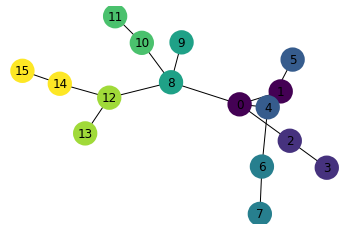

In [2]:
G_bin = nx.binomial_tree(4) # Returns the Binomial Tree of order n.
calculate_and_draw(G_bin)

 number of nodes: 15

0 :  [0, 1, 3, 7, 8]
1 :  [0, 1, 4, 9, 10]
2 :  [0, 2, 5, 11, 12]
3 :  [0, 2, 6, 13, 14]


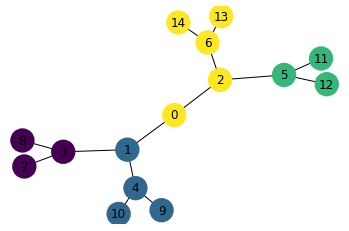

In [3]:
G_balanced = nx.balanced_tree(2,3) # Returns the perfectly balanced r-ary tree of height h.
calculate_and_draw(G_balanced)

 number of nodes: 31

0 :  [0, 1]
1 :  [0, 2]
2 :  [3, 7, 15, 16]
3 :  [3, 8, 17, 18]
4 :  [4, 9, 19, 20]
5 :  [4, 10, 21, 22]
6 :  [5, 11, 23, 24]
7 :  [5, 12, 25, 26]
8 :  [6, 13, 27, 28]
9 :  [6, 14, 29, 30]


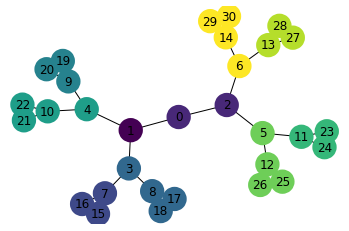

In [4]:
G_balanced = nx.balanced_tree(2,4) # Returns the perfectly balanced r-ary tree of height h.
calculate_and_draw(G_balanced)

 number of nodes: 10

0 :  [2, 5]
1 :  [3, 6]
2 :  [3, 7]
3 :  [0, 1, 8]
4 :  [4, 9]


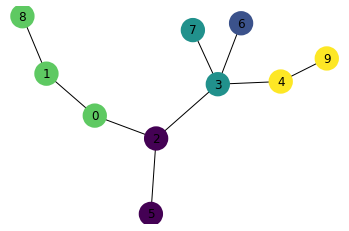

In [10]:
G_gn = nx.gn_graph(10) # (Directed) Returns the growing network (GN) digraph with n nodes.
calculate_and_draw(G_gn)

 number of nodes: 10

Stop at iteration 14
0 :  [0, 3, 4, 7]
1 :  [2, 5, 6]
2 :  [1, 8, 9]


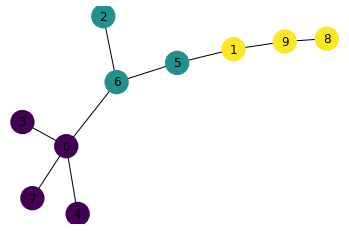

In [6]:
G_tree = nx.random_tree(10) # Returns a uniformly random tree on n nodes.
calculate_and_draw(G_tree)
